In [2]:
import sympy as sm
import numpy as np
from sympy.physics.vector import *

#### Question 1:
Given the (3-2-1) Euler angle set with $\theta_1 = 20^{\circ}, \theta_2 = 10^{\circ}, \theta_3 = -10^{\circ}$, what is the equivalent (3-1-3) set?

In [27]:
t1, t2, t3 = sm.symbols('theta_1, theta_2, theta_3')   # Rotation angles for (3-2-1) set
om, i, w = sm.symbols('Omega, i, omega')       # Rotation angles for (3-1-3) set

N = ReferenceFrame('N')
B = ReferenceFrame('B')
Bp = ReferenceFrame('Bp')   # 'Dummy' B frame used to examine 3-1-3 DMC and extract inverse transformation formulas

B.orient_body_fixed(N, (t1, t2, t3), '321')
Bp.orient_body_fixed(N, (om, i, w), '313')

C = B.dcm(N)
Cp = Bp.dcm(N)
display('BN (3-1-3):', Cp)

# Inverse transform formulas for a (3-1-3) rotation, derived via inspection of Cp
tom = sm.atan(C[2,0]/-C[2,1])
ti = sm.acos(C[2,2])
tw = sm.atan(C[0,2]/C[1,2])

vals321 = {t1: np.radians(20),
           t2: np.radians(10),
           t3: np.radians(-10)}

vals313 = {om: tom.subs(vals321),
            i: ti.subs(vals321),
            w: tw.subs(vals321)}

print('Om, i, w (3-1-3): {}'.format(vals313))
display('C:', C.subs(vals321))
display('Cp:', Cp.subs(vals313))
display(C.subs(vals321)*np.array([[1],[2],[3]]))
display(Cp.subs(vals313)*np.array([[1],[2],[3]]))

# Clear cache for next problem
N = None
B = None
del t1, t2, t3, om, i, w, Bp, C, Cp, tom, ti, tw, vals321, vals313

'BN (3-1-3):'

Matrix([
[-sin(Omega)*sin(omega)*cos(i) + cos(Omega)*cos(omega),  sin(Omega)*cos(omega) + sin(omega)*cos(Omega)*cos(i), sin(i)*sin(omega)],
[-sin(Omega)*cos(i)*cos(omega) - sin(omega)*cos(Omega), -sin(Omega)*sin(omega) + cos(Omega)*cos(i)*cos(omega), sin(i)*cos(omega)],
[                                    sin(Omega)*sin(i),                                    -sin(i)*cos(Omega),            cos(i)]])

Om, i, w (3-1-3): {Omega: -0.428678196229961, i: 0.246196916778932, omega: 0.793052280166070}


'C:'

Matrix([
[ 0.925416578398323, 0.336824088833465,  -0.17364817766693],
[-0.365159288446675, 0.915103409157124, -0.171010071662834],
[  0.10130572780775,  0.22166480038679,  0.969846310392954]])

'Cp:'

Matrix([
[ 0.925416578398323,  0.336824088833465, 0.173648177666931],
[-0.365159288446675,  0.915103409157124, 0.171010071662835],
[ -0.10130572780775, -0.221664800386791, 0.969846310392954]])

Matrix([
[1.07812022306446],
[0.95201731487907],
[3.45417425976019]])

Matrix([
[2.12000928906605],
[1.97807774485608],
[2.36490360259753]])

#### Question 2 (CORRECT):

The reference frames $\mathscr{N}$:{$\hat{\bf{n}}_1$, $\hat{\bf{n}}_2$, $\hat{\bf{n}}_2$} and $\mathscr{B}$:{$\hat{\bf{b}}_L$, $\hat{\bf{b}}_{\theta}$, $\hat{\bf{b}}_r$} are shown in the Figure. The disk is rolling on the ring without slip.  
Find the direction cosine matrix [BN] in terms of the angle ϕ.

!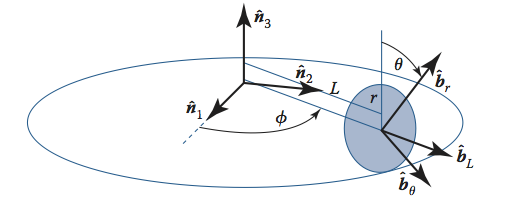

In [166]:
phi, th = sm.symbols('phi, theta')   # Rotation angles
L, r = sm.symbols('L, r')               # Physical properties

N = ReferenceFrame('N')
B = ReferenceFrame('B', indices=('L','theta','r'))

B.orient_body_fixed(N, (phi, -th, 0), '313')

BN = B.dcm(N)
vals = {th: phi*L/r}

BN.subs(vals)

Matrix([
[              cos(phi),              sin(phi),             0],
[-sin(phi)*cos(L*phi/r), cos(phi)*cos(L*phi/r), -sin(L*phi/r)],
[-sin(phi)*sin(L*phi/r), sin(L*phi/r)*cos(phi),  cos(L*phi/r)]])

#### Question 3 (CORRECT):

The reference frames $\mathscr{N}$:{$\hat{\bf{n}}_1$, $\hat{\bf{n}}_2$, $\hat{\bf{n}}_2$} and $\mathscr{B}$:{$\hat{\bf{b}}_L$, $\hat{\bf{b}}_{\theta}$, $\hat{\bf{b}}_r$} are shown in the Figure. The disk is rolling on the ring without slip.  
Given the vector $^\mathscr{B}\bf{v} = 1 \hat{\bf{b}}_r + 1 \hat{\bf{b}}_{\theta} + 2 \hat{\bf{b}}_L$, find the vector $^\mathscr{N}\bf{v}$.

In [167]:
V = 2*B.x + B.y + B.z
sm.Matrix([V.express(N).dot(N.x), V.express(N).dot(N.y), V.express(N).dot(N.z)]).subs(vals)

Matrix([
[-sin(phi)*sin(L*phi/r) - sin(phi)*cos(L*phi/r) + 2*cos(phi)],
[ 2*sin(phi) + sin(L*phi/r)*cos(phi) + cos(phi)*cos(L*phi/r)],
[                               -sin(L*phi/r) + cos(L*phi/r)]])

In [168]:
BN.subs(vals).transpose()*sm.Matrix([V.dot(B.x), V.dot(B.y), V.dot(B.z)])

Matrix([
[-sin(phi)*sin(L*phi/r) - sin(phi)*cos(L*phi/r) + 2*cos(phi)],
[ 2*sin(phi) + sin(L*phi/r)*cos(phi) + cos(phi)*cos(L*phi/r)],
[                               -sin(L*phi/r) + cos(L*phi/r)]])

#### Question 4 (CORRECT):

Consider the set of (2-3-2) Euler angles.  
Find the mapping of these angles $(\theta_1, \theta_2, \theta_3)$ to the corresponding ${[C]}$ DCM

In [169]:
th1, th2, th3 = sm.symbols('theta_1, theta_2, theta_3')   # Rotation angles
Bp = ReferenceFrame('Bp')
Bp.orient_body_fixed(N, (th1, th2, th3), 'YZY')

Bp.dcm(N)

Matrix([
[-sin(theta_1)*sin(theta_3) + cos(theta_1)*cos(theta_2)*cos(theta_3), sin(theta_2)*cos(theta_3), -sin(theta_1)*cos(theta_2)*cos(theta_3) - sin(theta_3)*cos(theta_1)],
[                                         -sin(theta_2)*cos(theta_1),              cos(theta_2),                                           sin(theta_1)*sin(theta_2)],
[ sin(theta_1)*cos(theta_3) + sin(theta_3)*cos(theta_1)*cos(theta_2), sin(theta_2)*sin(theta_3), -sin(theta_1)*sin(theta_3)*cos(theta_2) + cos(theta_1)*cos(theta_3)]])

#### Question 5 (CORRECT):

Consider the set of (2-3-2) Euler angles.  
Find appropriate inverse transformations from ${[C]}$ back to the (2-3-2) Euler angles.

$\theta_1 = tan^{-1}(\frac{C_{23}}{-C_{21}})$  
$\theta_2 = cos^{-1}(C_{22})$  
$\theta_3 = tan^{-1}(\frac{C_{32}}{C_{12}})$  